# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.



DOWNLOAD DATASET FROM HERE

**Importing modules**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression      #for model
from sklearn.model_selection import train_test_split   #for training and testing
from sklearn.metrics import  mean_squared_error        #for estimation of actual value

**Dataset description**

In [38]:
#assigning a variable for dataset
car_data = pd.read_csv("/content/carprice.csv")
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [39]:
#assigning dataframe variable
car_df = pd.DataFrame(car_data)

In [40]:
#shape of dataset
car_df.shape

(205, 26)

In [41]:
#checking presence of any null row and sum it
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [42]:
#first five rows in dataset
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
#description of dataset
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Visualization**

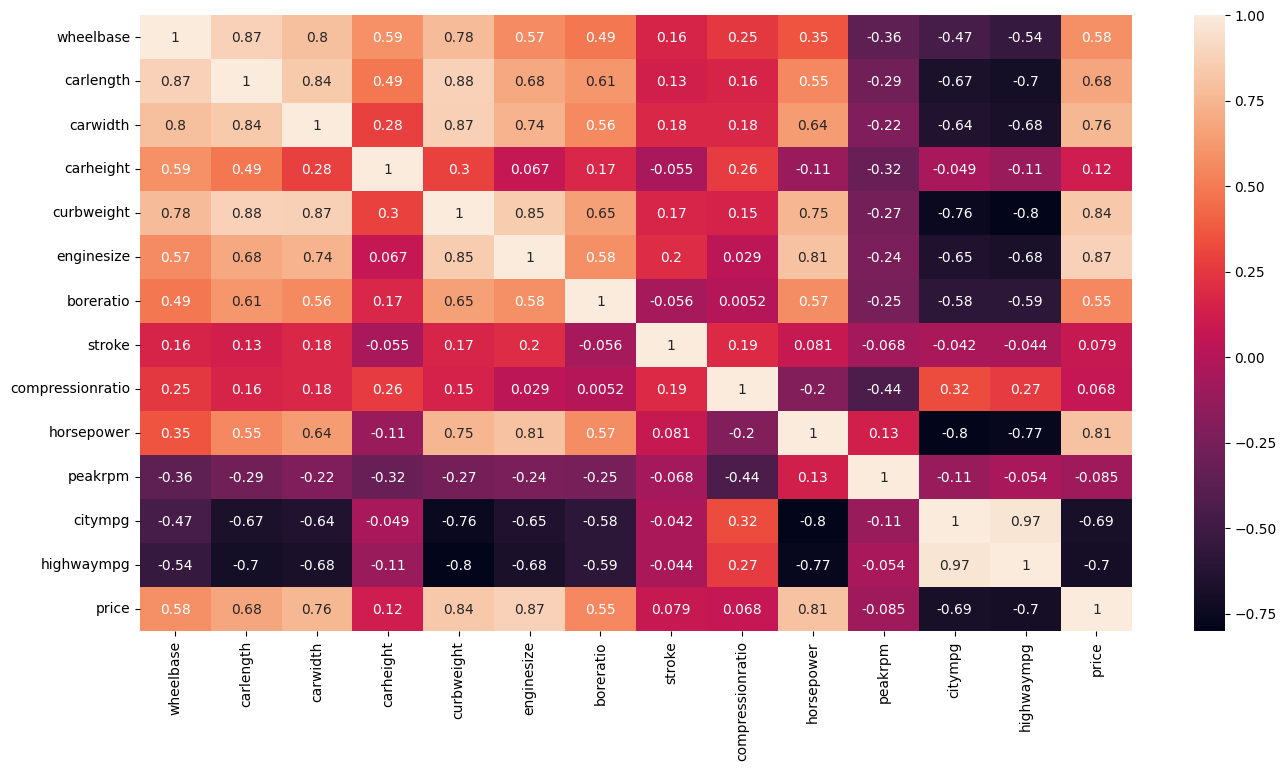

In [44]:
plt.figure(figsize=(16,8))

df1 = car_df.select_dtypes(include=['float64', 'int'])
df1 = df1.drop(['symboling', 'car_ID'], axis=1)
df1 = df1.corr()

sns.heatmap(df1, annot=True)
plt.show()

**Trainig and testing**

In [45]:
X = car_df.iloc[:, 2:-1].values
y = car_df.iloc[:, -1].values
X

array([['alfa-romero giulia', 'gas', 'std', ..., 5000, 21, 27],
       ['alfa-romero stelvio', 'gas', 'std', ..., 5000, 21, 27],
       ['alfa-romero Quadrifoglio', 'gas', 'std', ..., 5000, 19, 26],
       ...,
       ['volvo 244dl', 'gas', 'std', ..., 5500, 18, 23],
       ['volvo 246', 'diesel', 'turbo', ..., 4800, 26, 27],
       ['volvo 264gl', 'gas', 'turbo', ..., 5400, 19, 25]], dtype=object)

In [46]:
#dropping columns
X1 = car_df.drop(['price', 'CarName', 'fueltype', 'aspiration',
                 'doornumber', 'carbody',	'drivewheel', 'enginelocation',
                 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1)
X1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [47]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

In [49]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = reg.predict(X_train)
y_pred

array([ 8258.48038405, 10244.15882072, 10404.19651856, 21782.83402439,
        9794.54344325,  6894.4729792 ,  7253.20938614,  5470.91132535,
        5956.5410416 , 10162.080847  ,  6638.97018808,  8459.9558662 ,
        8749.81585148, 19039.26319371,  5982.75775849, 15037.5632839 ,
        8758.1564047 , 18482.41102348, 20829.86333611, 18516.28749769,
        9319.27172578, 18961.80625356,  8837.16547815, 27577.73169302,
       11748.73757028, 13451.27723151, 17060.10320991,  5681.36848066,
       10216.65015069, 18531.9354166 , 10300.870957  , 10679.9281862 ,
       14804.29527756,  6456.30644822, 15495.27863727, 15891.39675026,
       38773.61739697, 14533.90276037, 10182.36364719,  4319.68386734,
        6655.95842208, 13417.73697328,  5494.61656281,  4557.34379634,
        5772.63398676, 16622.51316237,  4742.56470474, 14964.69532597,
        5962.09396299, 18984.24585366,  5898.02494513, 10225.27082981,
        8739.03572581, 10222.32424333, 24748.57211827, 45876.76077637,
      

In [51]:
#accuracy in model
tr = reg.score(X_train,y_train)*100
ts = reg.score(X_test, y_test)*100

print("Accuracy of knn training model : ",tr,"%")
print("Accuracy of knn testing model : ",ts,"%")

Accuracy of knn training model :  86.58729778607635 %
Accuracy of knn testing model :  84.56252529222635 %
